# FIFA 21 MoneyBall

Use a Linear Regression Model to predict the Value of FIFA players.

## Import Libraries

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats.mstats import winsorize

import math
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [64]:
data = pd.read_csv(r"Data/fifa21_male2.csv")

## Review and Clean Data

In [65]:
data.shape

(17125, 107)

In [66]:
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


### Set Option Display max rows/columns (due to size of Dataset)

In [67]:
pd.set_option('display.max_rows', 110)
pd.set_option('display.max_columns', 110)

### Cleaning Column Names

In [68]:
list(data.columns)

['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'Player Photo',
 'Club Logo',
 'Flag Photo',
 'POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 

In [69]:
data.columns = data.columns.str.lower()
data.columns = [column.lower().replace(' ', '_').replace('/', '_') for column in data.columns]

In [70]:
data.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)

### Drop Columns

In [71]:
data.shape

(17125, 107)

**drop columns that cannot be used for analysis:** <br>
- name and id do not add any value to our model
- player_photo, club_logo, flag_photo are links
- there is only one gender so no added information
- loan_date_end are mainly null values or unstructured dates
- position because of several positions per row, we also have the column best position to use for position
- stats per position are dropped for now because I could not find a reason to keep them

In [72]:
data = data.drop(data.loc[:, "id":"name"].columns, axis = 1)
data = data.drop(['player_photo', "club_logo", "flag_photo", "gender", "loan_date_end", "position", "team_&_contract", "joined"], axis=1)
data = data.drop(data.loc[:, "height":"weight"].columns, axis = 1)
data = data.drop(data.loc[:, "ls":"gk"].columns, axis = 1)
data = data.drop(data.loc[:, "release_clause":"sliding_tackle"].columns, axis = 1)
data = data.drop(data.loc[:, "gk_diving":"base_stats"].columns, axis = 1)
data = data.drop(data.loc[:, "w_f":"ir"].columns, axis = 1)

In [73]:
data.shape

(17125, 19)

### Clean up Columns containing €,K,M Values

Some columns contain numerical values but also special characters that need to be removed for the model.

In [74]:
def clean_char(x):
    if (x.startswith('€') and x.endswith('K') and (x.find('.')>=0)):
        return x.replace("€","").replace("K","").replace(".","") + "00"      
    elif (x.startswith('€') and x.endswith('K')):
        return x.replace("€","").replace("K","") + "000" 
    if (x.startswith('€') and x.endswith('M') and (x.find('.')>=0)):
        return x.replace("€","").replace("M","").replace(".","") + "00000"      
    elif (x.startswith('€') and x.endswith('M')):
        return x.replace("€","").replace("M","") + "000000" 
    else:
        return x.replace("€","")

data['value'] = pd.to_numeric(data['value'].apply(clean_char))
data['wage'] = pd.to_numeric(data['wage'].apply(clean_char))

### Review DTypes

In [75]:
data.dtypes

age             int64
ova             int64
nationality    object
club           object
bov             int64
bp             object
pot             int64
foot           object
growth          int64
value           int64
wage            int64
goalkeeping     int64
pac             int64
sho             int64
pas             int64
dri             int64
def             int64
phy             int64
hits           object
dtype: object

### Drop Duplicates

In [76]:
data.shape

(17125, 19)

In [77]:
data = data.drop_duplicates()

In [78]:
data.shape

(17125, 19)

No duplicates present in this dataset.

##  Review Cleaned Dataset

In [79]:
round(data.corr()['value'].sort_values(ascending=False),2)

value          1.00
wage           0.82
bov            0.64
ova            0.63
pot            0.56
pas            0.44
dri            0.44
sho            0.32
phy            0.27
pac            0.21
def            0.17
age            0.10
goalkeeping    0.00
growth        -0.19
Name: value, dtype: float64

In [80]:
data.describe()

,age,ova,bov,pot,growth,value,wage,goalkeeping,pac,sho,pas,dri,def,phy
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,1.712500e+04,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,25.272934,66.965022,67.900204,72.489810,5.524788,2.567377e+06,10532.928467,77.609693,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,4.942665,6.864329,6.637538,5.769949,5.787539,5.372622e+06,21145.376646,81.136603,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,16.000000,38.000000,42.000000,47.000000,-1.000000,0.000000e+00,0.000000,5.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,21.000000,62.000000,64.000000,69.000000,0.000000,3.750000e+05,1000.000000,48.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,25.000000,67.000000,68.000000,72.000000,4.000000,8.000000e+05,3000.000000,53.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,29.000000,72.000000,72.000000,76.000000,9.000000,2.400000e+06,11000.000000,59.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000
max,53.000000,93.000000,93.000000,95.000000,26.000000,1.055000e+08,560000.000000,440.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000


In [81]:
data.corr()

,age,ova,bov,pot,growth,value,wage,goalkeeping,pac,sho,pas,dri,def,phy
age,1.000000,0.517099,0.456734,-0.237619,-0.850204,0.095981,0.200851,0.125933,-0.177291,0.309438,0.396082,0.241027,0.223184,0.436462
ova,0.517099,1.000000,0.985877,0.592268,-0.595585,0.631679,0.592925,0.038222,0.201319,0.487060,0.699229,0.643427,0.344906,0.543354
bov,0.456734,0.985877,1.000000,0.628323,-0.542890,0.640818,0.592453,-0.008702,0.212889,0.478573,0.689975,0.640746,0.349906,0.535579
pot,-0.237619,0.592268,0.628323,1.000000,0.294499,0.563570,0.462235,-0.007277,0.259294,0.244481,0.395773,0.445004,0.170562,0.159959
growth,-0.850204,-0.595585,-0.542890,0.294499,1.000000,-0.187347,-0.242411,-0.052589,0.019730,-0.333941,-0.434753,-0.319487,-0.239034,-0.484974
value,0.095981,0.631679,0.640818,0.563570,-0.187347,1.000000,0.822728,0.002641,0.210809,0.323770,0.444484,0.442156,0.172856,0.266541
wage,0.200851,0.592925,0.592453,0.462235,-0.242411,0.822728,1.000000,-0.011207,0.122591,0.294205,0.419563,0.389842,0.191576,0.260983
goalkeeping,0.125933,0.038222,-0.008702,-0.007277,-0.052589,0.002641,-0.011207,1.000000,-0.002572,0.248762,0.172027,0.161038,-0.203839,0.061890
pac,-0.177291,0.201319,0.212889,0.259294,0.019730,0.210809,0.122591,-0.002572,1.000000,0.305392,0.248176,0.521642,-0.253257,-0.126338
sho,0.309438,0.487060,0.478573,0.244481,-0.333941,0.323770,0.294205,0.248762,0.305392,1.000000,0.658508,0.765627,-0.416957,0.051973


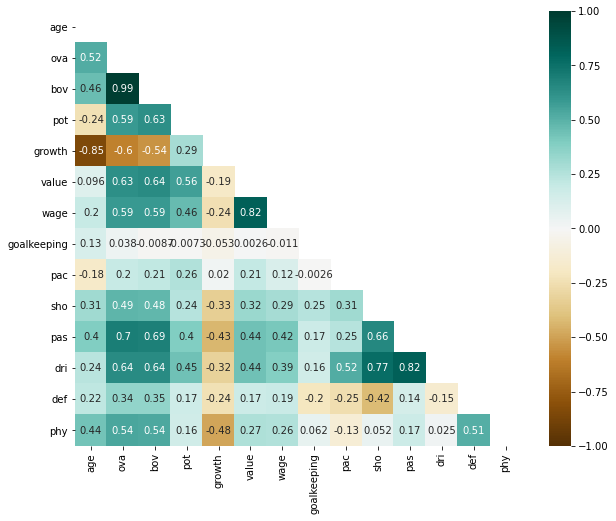

In [82]:
# create correlation heatmap 

mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.show()

## Split Data into numerical and categorical dataframes

In [84]:
num_df = data.select_dtypes(include = np.number)
cat_df = data.select_dtypes(include = object)

## Deal with Outliers

### Visually check for Outliers

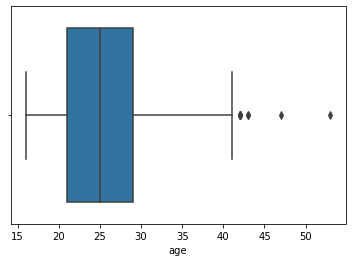

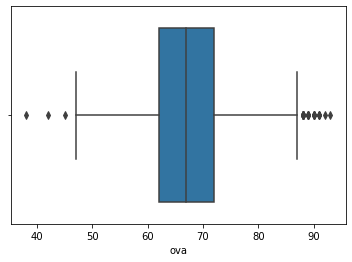

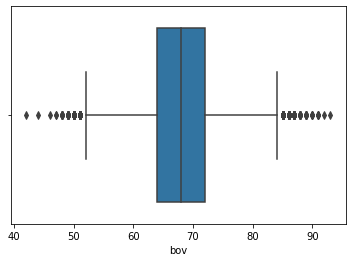

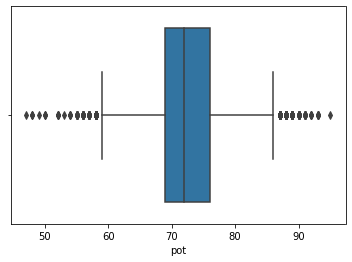

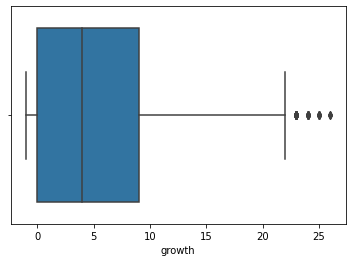

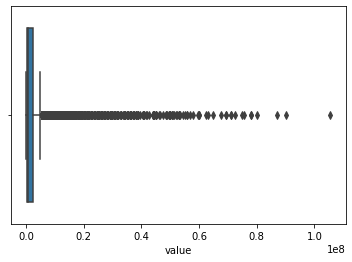

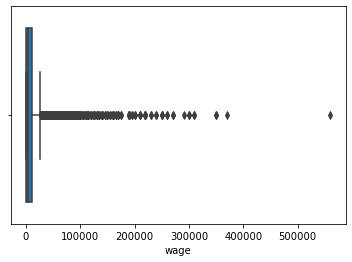

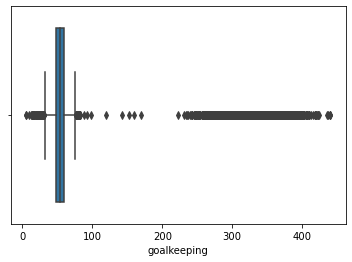

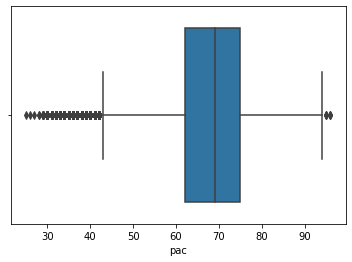

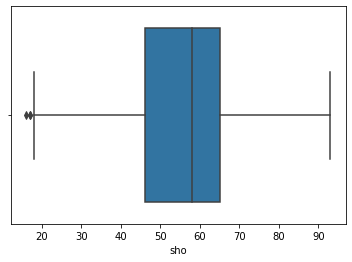

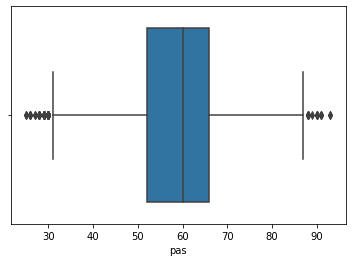

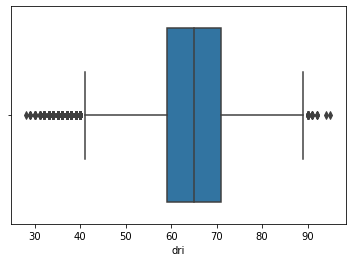

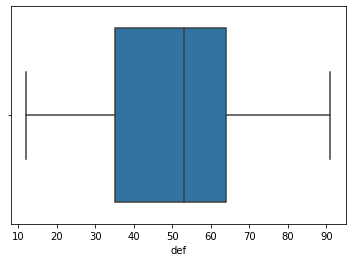

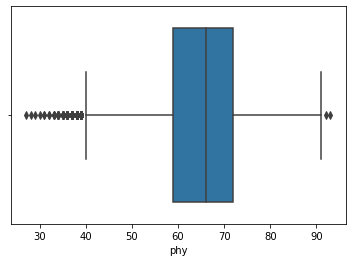

In [85]:
for column in num_df.columns:
    sns.boxplot(num_df[column])
    plt.show()

## Create different Models

### Outliers not removed, no normalization, dummy encoding ( rows ×  columns)